In [51]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 10, 7
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 500

save_figures_to_latex = False
figures_path = '/home/tellocam/Projects/HPC/Exercise_2/latex_ex_2/figures'


In [57]:
txt_files = glob.glob("EX1_*.txt")
print(txt_files)

def change_filename(txt_name):
    # Create number of nodes String prefix
    if 'EX1_1' in txt_name: N = 'N1_'
    if 'EX1_20' in txt_name: N = 'N20_'
    if 'EX1_32' in txt_name: N = 'N32_'
    # Create Tasks Per Node String
    if '_1_' in txt_name: TPN = 'T1_'
    if '_16_' in txt_name: TPN = 'T16_'
    if '_32_' in txt_name and : TPN = 'T32_'
    # Create power String Suffix
    if '_2.txt' in txt_name: P = 'P2'
    if '_10.txt' in txt_name: P = 'P10'
    return N + TPN + P

df_dict = {}
for file in txt_files:
    df = pd.read_csv(file, sep=',', header=None)
    df.rename(columns={0:"count", 1:"bytes", 2:"avg", 3:"min", 4:"med", 5:"stddev", 6:"CI"}, inplace=True)
    df_dict[change_filename(file)] = df

print(df_dict.keys())

['EX1_1_16_10.txt', 'EX1_32_1_2.txt', 'EX1_20_32_2.txt', 'EX1_32_1_10.txt', 'EX1_32_16_10.txt', 'EX1_20_32_10.txt', 'EX1_20_1_10.txt', 'EX1_20_16_10.txt', 'EX1_1_32_2.txt', 'EX1_32_16_2.txt', 'EX1_20_16_2.txt', 'EX1_32_32_10.txt', 'EX1_20_1_2.txt', 'EX1_32_32_2.txt', 'EX1_1_32_10.txt', 'EX1_1_16_2.txt']
dict_keys(['N1_T16_P10', 'N32_T32_P2', 'N20_T32_P2', 'N32_T32_P10', 'N20_T32_P10', 'N20_T1_P10', 'N20_T16_P10', 'N1_T32_P2', 'N20_T16_P2', 'N20_T1_P2', 'N1_T32_P10', 'N1_T16_P2'])


N32_T32_P2


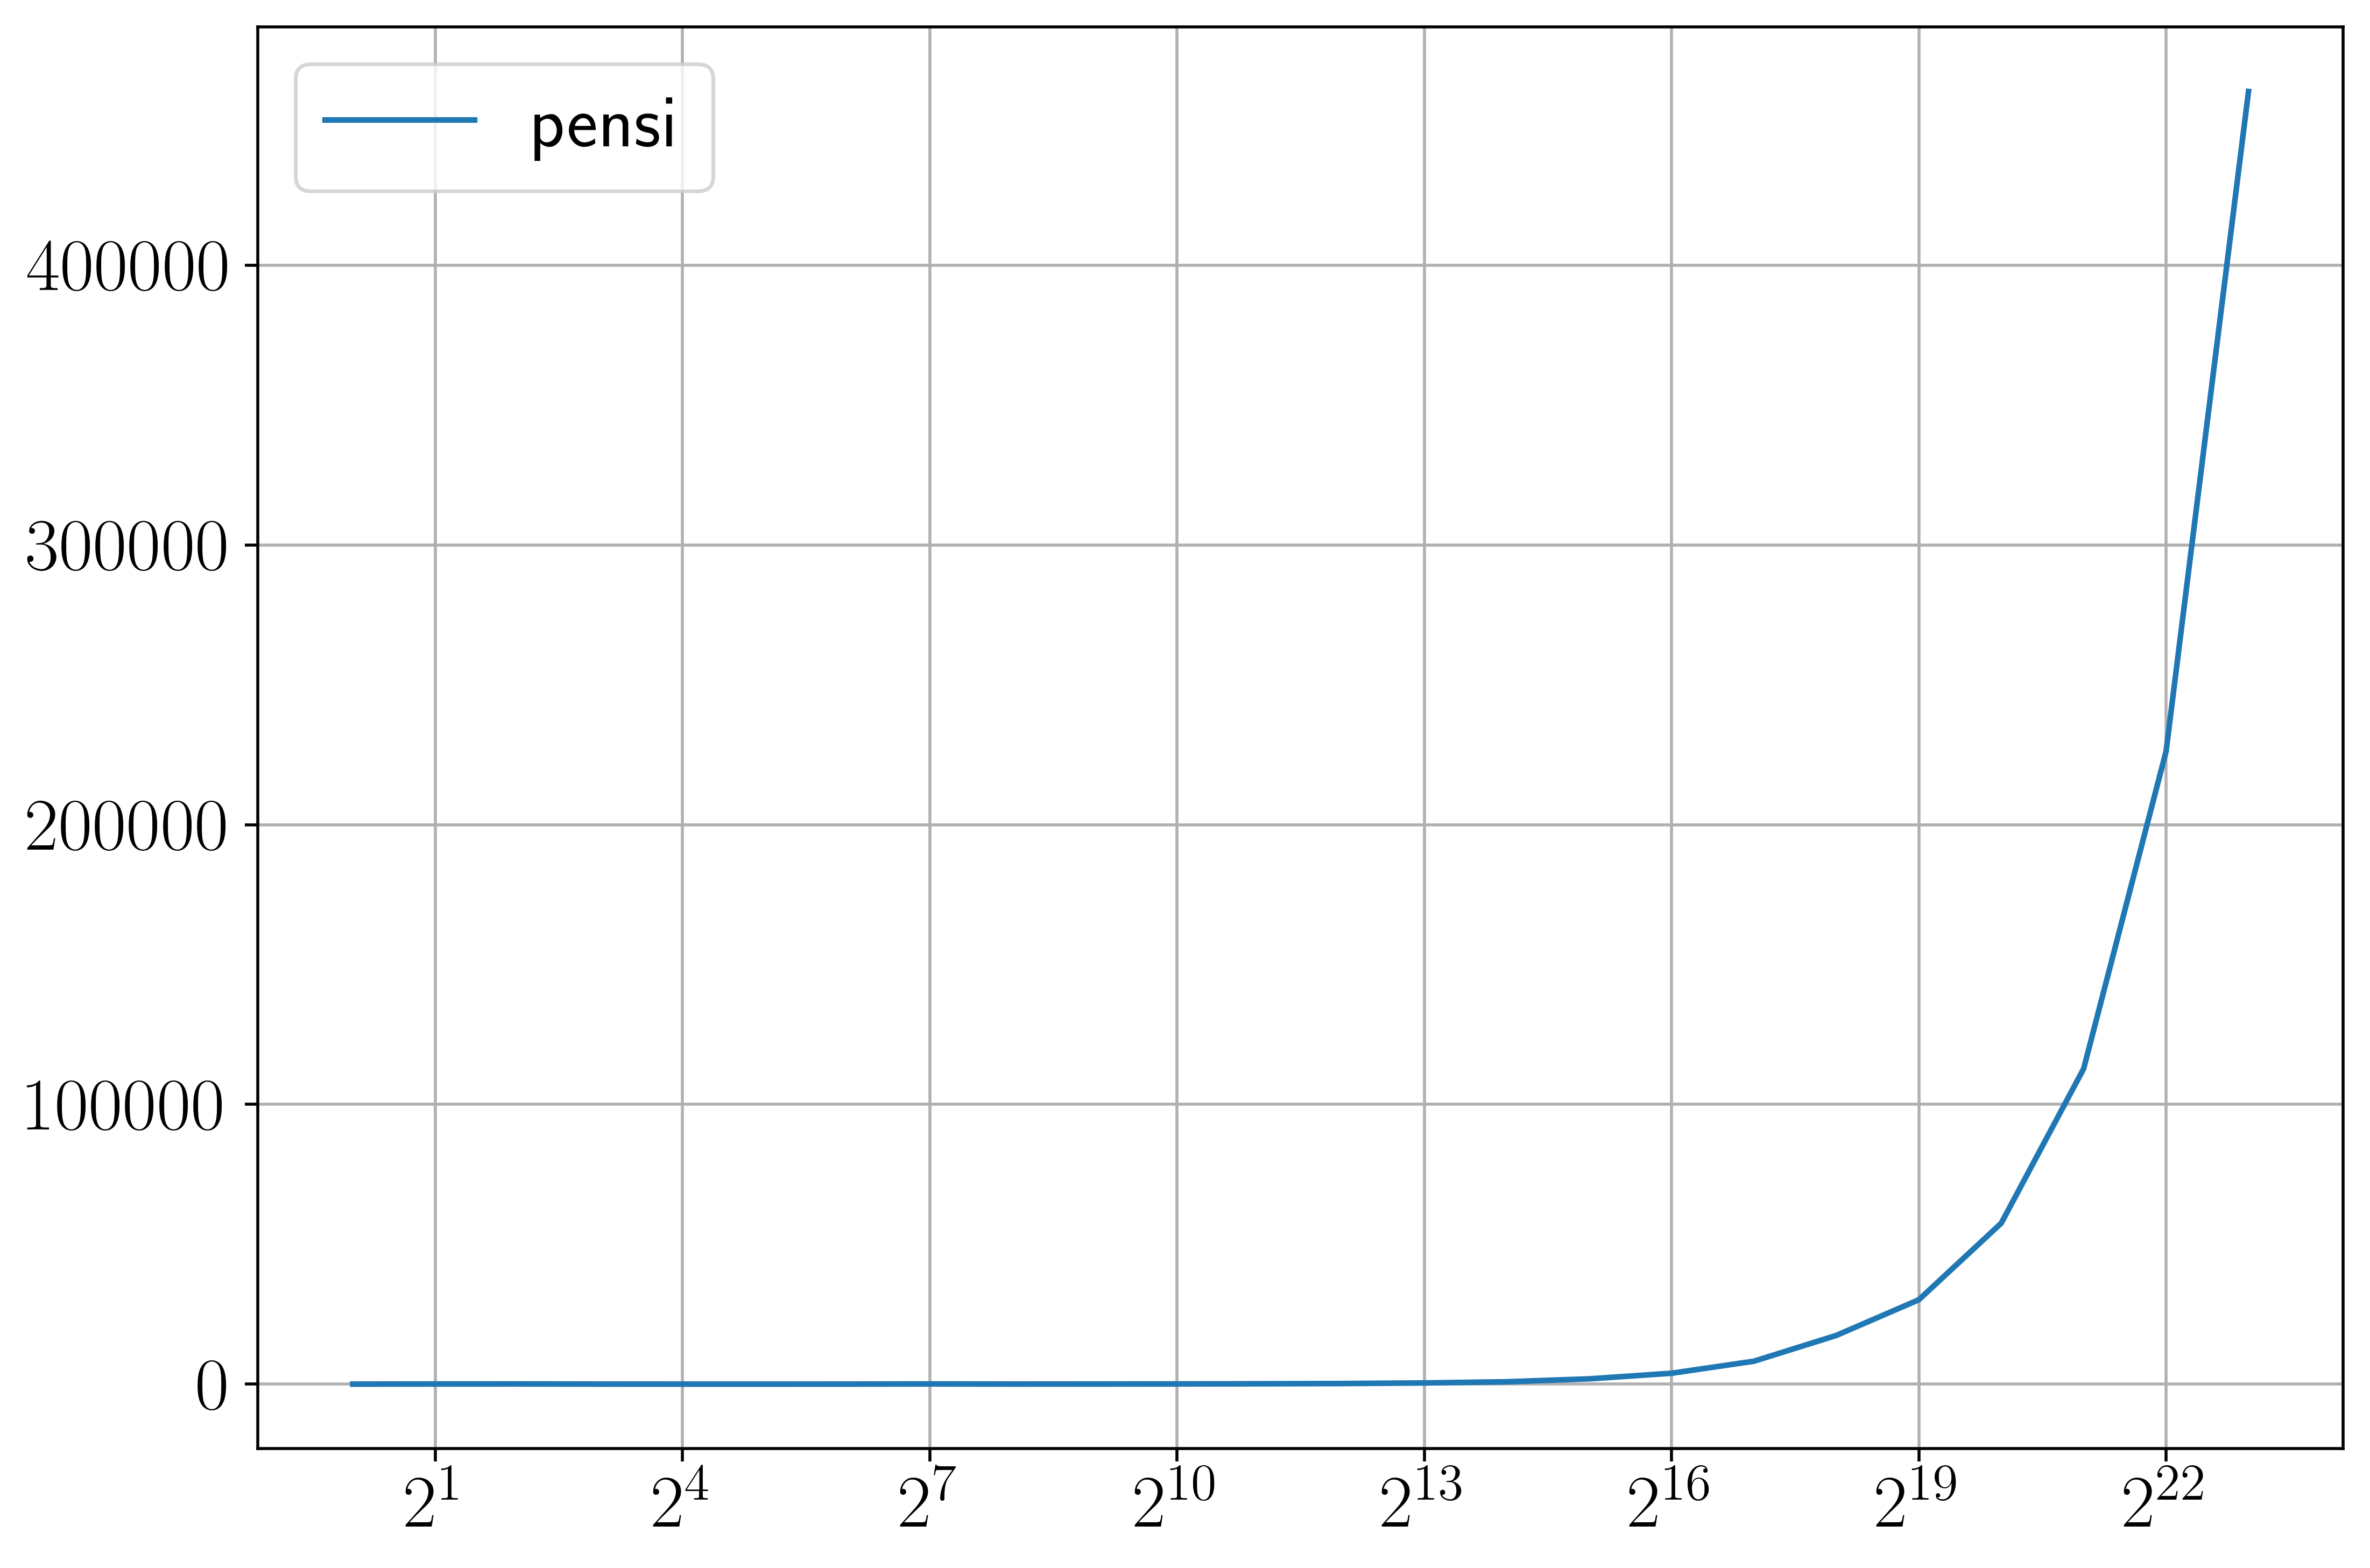

In [56]:
plt.figure(0)
plt.grid()
for key in df_dict:
    if 'P2' in key and 'N32' in key:
        print(key)
        plot_df = df_dict.get(key)
        plt.plot(plot_df['count'], plot_df['avg'], label='pensi')
        plt.xscale('log', base=2)
plt.legend()



